In [16]:
from sklearn.datasets import fetch_olivetti_faces
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn import metrics
import numpy as np

In [2]:
olivetti_data = fetch_olivetti_faces()

# 400 images - 10x40 (40 people, 10 images per person), image - 64x64 pixels
features = olivetti_data.data
targets = olivetti_data.target

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to /Users/caelyasutake/scikit_learn_data


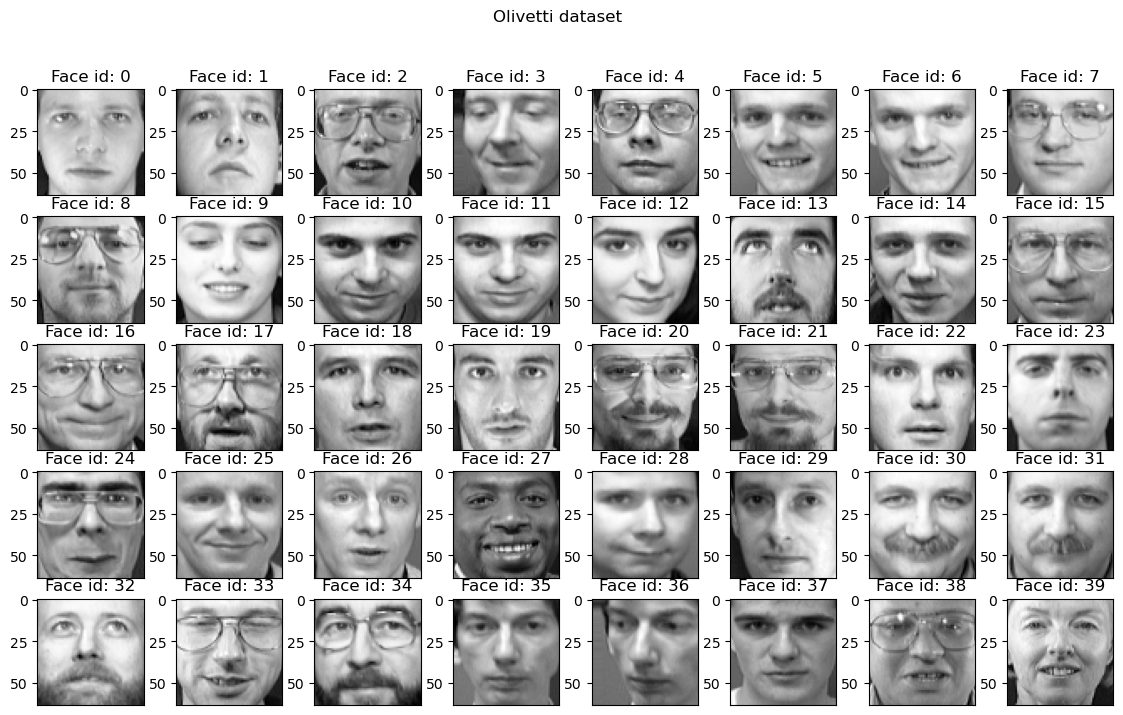

In [6]:
fig, sub_plots = plt.subplots(nrows=5, ncols=8, figsize=(14, 8))
sub_plots = sub_plots.flatten()

for unique_user_id in np.unique(targets):
    image_index = unique_user_id * 8
    sub_plots[unique_user_id].imshow(features[image_index].reshape(64, 64), cmap='gray')
    sub_plots[unique_user_id].set_xticks([])
    sub_plots[unique_user_id].set_xticks([])
    sub_plots[unique_user_id].set_title("Face id: %s" % unique_user_id)

plt.suptitle("Olivetti dataset")
plt.show()

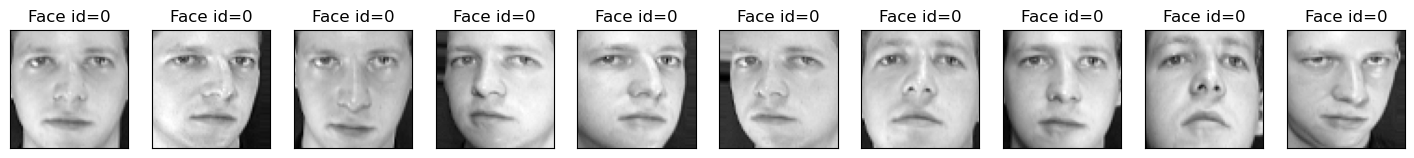

In [5]:
fig, sub_plots = plt.subplots(nrows=1, ncols=10, figsize=(18,9))

for j in range(10):
    sub_plots[j].imshow(features[j].reshape(64, 64), cmap='gray')
    sub_plots[j].set_xticks([])
    sub_plots[j].set_yticks([])
    sub_plots[j].set_title("Face id=0")
plt.show()

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(features, targets, test_size=0.25, stratify=targets, random_state=0)

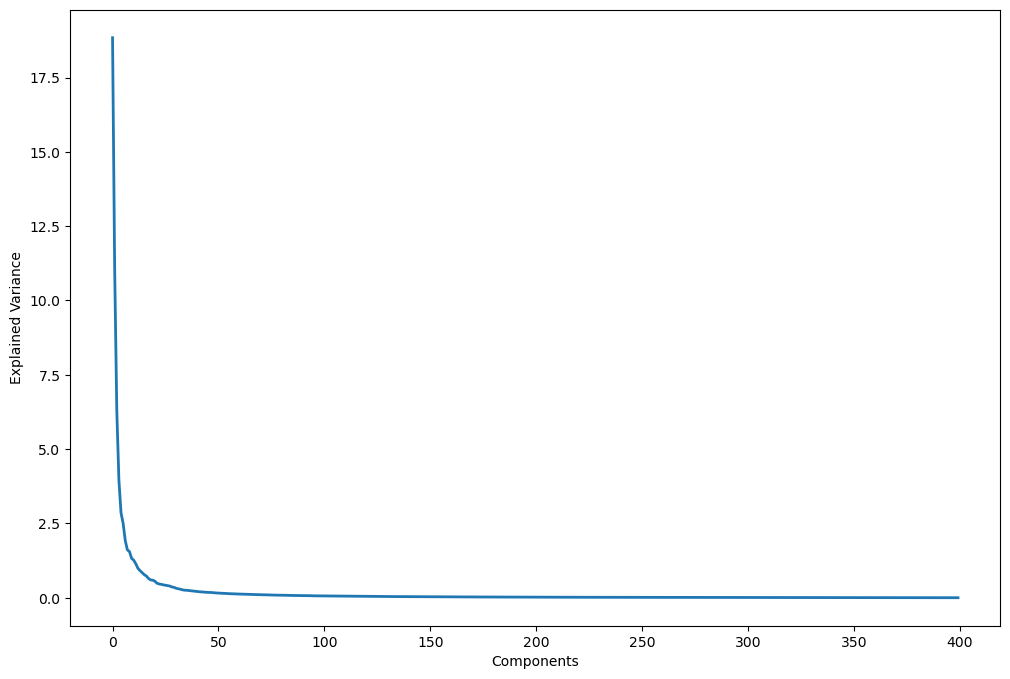

In [8]:
# optimal number of eigenvectors (principal components)
pca = PCA()
pca.fit(features)

plt.figure(1, figsize=(12, 8))
plt.plot(pca.explained_variance_, linewidth=2)
plt.xlabel('Components')
plt.ylabel('Explained Variance')
plt.show()

In [14]:
pca = PCA(n_components=100, whiten=True)
pca.fit(X_train)

X_pca = pca.fit_transform(features)

X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

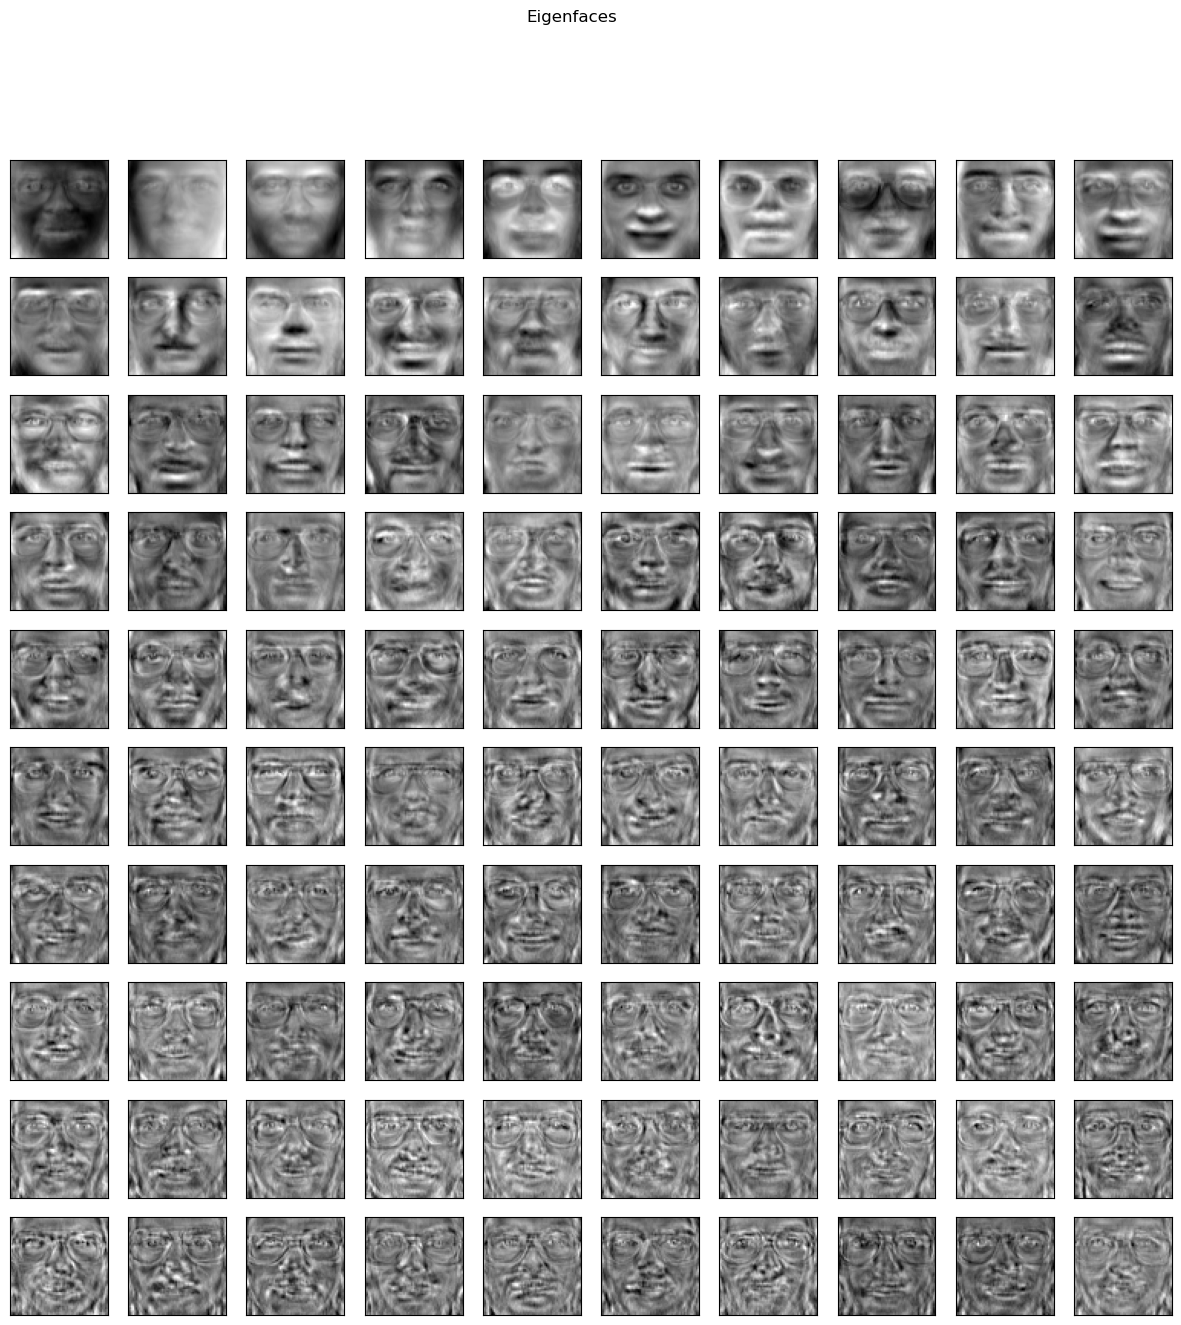

In [11]:
number_of_eigenfaces = len(pca.components_)
eigen_faces = pca.components_.reshape((number_of_eigenfaces, 64, 64))

fig, sub_plots = plt.subplots(nrows=10, ncols=10, figsize=(15, 15))
sub_plots = sub_plots.flatten()

for i in range(number_of_eigenfaces):
    sub_plots[i].imshow(eigen_faces[i], cmap='gray')
    sub_plots[i].set_xticks([])
    sub_plots[i].set_yticks([])

plt.suptitle("Eigenfaces")
plt.show()

In [17]:
# machine learning models

models = [("Logistic Regression", LogisticRegression()), ("Support Vector Machine", SVC()), ("Naive Bayes Classifier", GaussianNB())]

for name, model in models:
    kfold = KFold(n_splits=5, shuffle=True, random_state=0)
    cv_scores = cross_val_score(model, X_pca, targets, cv=kfold)
    print("Mean of the cross_validation scores: %s" % cv_scores.mean())

    '''classifier_model = model
    classifier_model.fit(X_train_pca, Y_train)

    y_predicted = classifier_model.predict(X_test_pca)
    print("Results with %s" % name)
    print("Accuracy score: %s" % (metrics.accuracy_score(Y_test, y_predicted)))'''

Mean of the cross_validation scores: 0.93
Mean of the cross_validation scores: 0.86
Mean of the cross_validation scores: 0.7474999999999999
